In [78]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import os
import numpy as np
import h5py


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## dirichlet pl4ql4 anneal beta negKL

In [87]:
savedirs = {
    'Dirichlet2_beta_annealed':       '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet2_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_BN_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1/',
    'Dirichlet2_beta_annealed_negKL': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet2_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_nKL_BN_Dirichlet2_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
    
    'Dirichlet_beta_annealed_negKL': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_nKL_BN_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
    'exactM2': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_exactM2_get_samples-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_BN_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_tp_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
    'LogisticNormal': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_LogisticNormal_get_samples-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_BN_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
}


In [88]:
for k,v in savedirs.iteritems():
    print k, os.listdir(v)

LogisticNormal ['final.h5', 'config.pkl', 'samples.h5']
exactM2 ['final.h5', 'config.pkl', 'final-samples.h5', 'samples.h5']
Dirichlet2_beta_annealed_negKL ['EP150-stats.h5', 'final.h5', 'config.pkl', 'EP300-stats.h5', 'EP50-stats.h5', 'EP100-stats.h5', 'EP250-stats.h5', 'EP200-stats.h5', 'EP0-stats.h5', 'samples.h5']
Dirichlet2_beta_annealed ['EP150-stats.h5', 'final.h5', 'config.pkl', 'EP300-stats.h5', 'EP50-stats.h5', 'EP100-stats.h5', 'EP250-stats.h5', 'EP200-stats.h5', 'EP0-stats.h5', 'samples.h5']
Dirichlet_beta_annealed_negKL ['final.h5', 'config.pkl', 'final-samples.h5', 'samples.h5']


In [89]:
filenames = ['final.h5','EP200-stats.h5','EP100-stats.h5','EP50-stats.h5']
def findfile(savedir,filenames):
    for f in filenames:
        path = os.path.join(savedir,f)
        if os.path.exists(path):
            return path
filepaths = {k:findfile(savedir,filenames) for k,savedir in savedirs.iteritems()}
filepaths

{'Dirichlet2_beta_annealed': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet2_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_BN_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1/final.h5',
 'Dirichlet2_beta_annealed_negKL': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet2_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_nKL_BN_Dirichlet2_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1/final.h5',
 'Dirichlet_beta_annealed_negKL': '/scratch/jmj/theanomodels/experiments/mnist_ssl_vae/004_Dirichlet_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_nKL_BN_sBNs_b0-0_20_fb5_00e-0

In [90]:
def loadDataHDF5(data):
    if isinstance(data,h5py.File) or isinstance(data,h5py.Group):
        return {k:loadDataHDF5(v) for k,v in data.iteritems()}
    elif isinstance(data,h5py.Dataset):
        return data.value
    else:
        print 'unhandled datatype: %s' % type(data)

def loadHDF5(filepath):
    with h5py.File(filepath,'r') as f:
        return loadDataHDF5(f)

In [91]:
results = {k:loadHDF5(filepath) for k,filepath in filepaths.iteritems()}
for k in results.keys():
    print k
    print results[k].keys()
    for kk in results[k].keys():
        pass
        #print results[k][kk].keys()

Dirichlet2_beta_annealed_negKL
[u'test', u'train', u'valid', u'time']
exactM2
[u'test', u'train', u'params', u'valid']
LogisticNormal
[u'test', u'train', u'valid']
Dirichlet2_beta_annealed
[u'test', u'train', u'valid', u'time']
Dirichlet_beta_annealed_negKL
[u'test', u'train', u'valid']


In [92]:
def plotExperiment(results,
                   title = '',
                   keys = ['cost','bound','accuracy'],
                   funcs = [min,min,max],
                   yscales = ['linear','linear','linear'],
                   ylims = [(100,600),(100,600),(0,1)],
                   locs = ['upper right','upper right','lower right'],
                   label_prefix=None
                   ):
    plt.figure(1,figsize=(18,4))
    for i,(key,f,yscale,ylim,loc) in enumerate(zip(keys,funcs,yscales,ylims,locs)):
        #print i,key
        plt.subplot(1,3,i+1)
        if label_prefix == None:
            label = 'best %s = %0.2f' % (key,f(results[key]))
        else:
            label='%s: best %s = %0.2f' % (label_prefix,key,f(results[key]))
        plt.plot(results['epochs'],results[key],label=label)
        plt.legend(loc=loc)
        plt.yscale(yscale)
        plt.title('%s %s' % (title,key))
        if ylim is not None:
            plt.ylim(ylim)

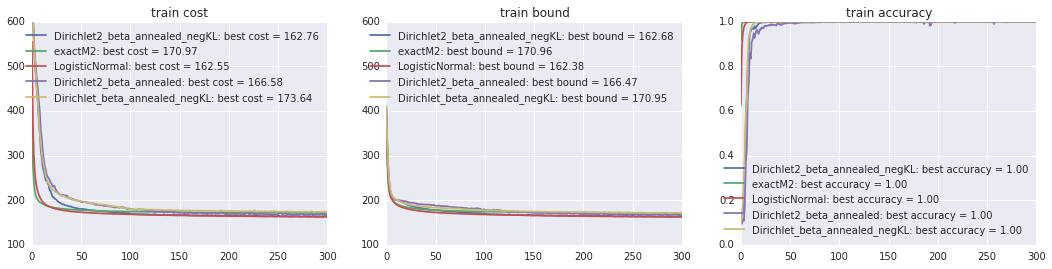

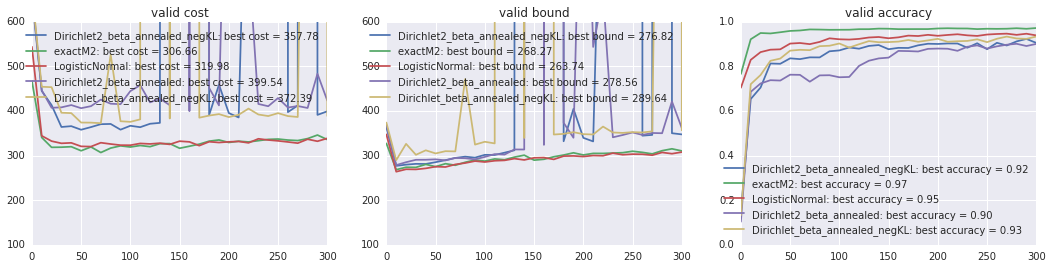

In [93]:
for k,r in results.iteritems():
    plotExperiment(r['train'],'train',label_prefix=k)
plt.show()
for k,r in results.iteritems():
    plotExperiment(r['valid'],'valid',label_prefix=k)
plt.show()

In [94]:
modelkey = 'Dirichlet2_beta_annealed_negKL'
#modelkey = 'LogisticNormal'
#modelkey = 'dirichlet_pl4ql4_BN_negKL'
#modelkey = 'exactM2'
train = results[modelkey]['train']
valid = results[modelkey]['valid']

In [95]:
samples = loadHDF5(os.path.join(savedirs[modelkey],'samples.h5'))
samples.keys()
for k,v in samples.iteritems():
    if 'epochs' not in k:
        v = np.squeeze(v)
        samples[k] = v.reshape(v.shape[0],v.shape[1],28,28)
        print k, samples[k].shape

dirichletL (31, 100, 28, 28)
dirichletU (31, 100, 28, 28)
onehotL (31, 1000, 28, 28)
onehotU (31, 1000, 28, 28)


In [96]:
for k,v in samples.iteritems():
    if 'epochs' not in k:
        v = np.squeeze(v)
        #print v.shape
        samples[k] = v.reshape(v.shape[0],v.shape[1],28,28)
        #dirichletL = dirichletL.reshape(11,100,28,28)
        #print samples[k].shape

In [97]:
for k,v in samples.iteritems():
    if 'onehot' in k:
        n = v.shape[0]
        samples[k] = np.concatenate([v[:,100*i:100*(i+1):,:].reshape(n,1,100,28,28) for i in range(10)],axis=1)
        print k,samples[k].shape

onehotL (31, 10, 100, 28, 28)
onehotU (31, 10, 100, 28, 28)


In [98]:
def todisplayimage(x,rows=10,sep=3):
    n,m1,m2 = x.shape
    cols = int(np.ceil(n/float(rows)))
    #print rows,cols
    y = np.zeros((rows*(m1+sep),cols*(m2+sep)))
    c=0
    for i in range(n):
        r = i % rows
        c = int(np.floor(i/rows))
        #print r*(m1+sep),r*(m1+sep)+m1,c*(m2+sep),c*(m2+sep)+m2,y.shape
        y[r*(m1+sep):r*(m1+sep)+m1,c*(m2+sep):c*(m2+sep)+m2] = x[i]
    return y
        


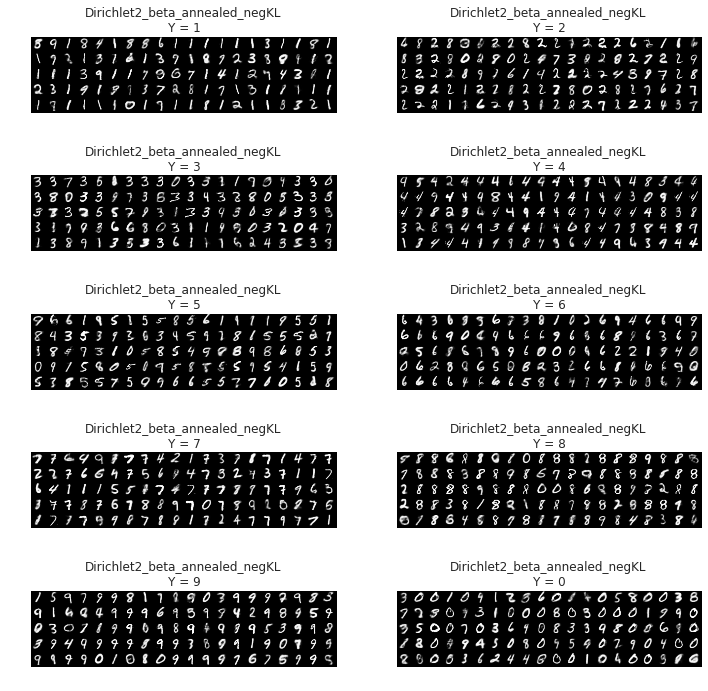

In [99]:
plt.figure(1,figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i)
    out = todisplayimage(samples['onehotL'][-1,i],rows=5)
    plt.imshow(1-out)
    plt.gca().grid(False)
    plt.title('%s\nY = %s' % (modelkey,i))
    plt.axis('off')
    #plt.show()

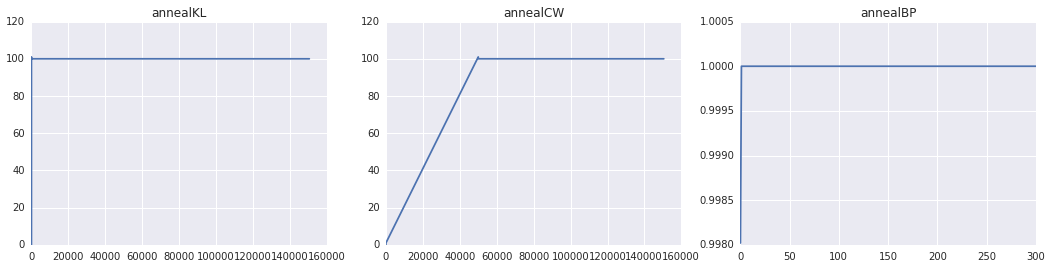

In [23]:
plt.figure(1,figsize=(18,4))
plt.subplot(1,3,1)
plt.plot(train['annealKL']*100,label='annealKL')
plt.title('annealKL')
plt.subplot(1,3,2)
plt.plot(train['annealCW']*100,label='annealCW')
plt.title('annealCW')
plt.subplot(1,3,3)
plt.plot(train['annealBP']*100,label='annealBP')
plt.title('annealBP')

In [24]:
sorted(train.keys())

[u'KL_L',
 u'KL_U',
 u'KL_Y',
 u'KL_Z_L',
 u'KL_Z_U',
 u'KL_alphaL',
 u'KL_alphaU',
 u'L-q_Z_0_BN_running_mean',
 u'L-q_Z_0_BN_running_var',
 u'L-q_Z_1_BN_running_mean',
 u'L-q_Z_1_BN_running_var',
 u'L-q_h(x)_0_BN_running_mean',
 u'L-q_h(x)_0_BN_running_var',
 u'L-q_h(x)_1_BN_running_mean',
 u'L-q_h(x)_1_BN_running_var',
 u'L-q_h(x)_2_BN_running_mean',
 u'L-q_h(x)_2_BN_running_var',
 u'L-q_h(x)_3_BN_running_mean',
 u'L-q_h(x)_3_BN_running_var',
 u'L-q_logbeta_0_BN_running_mean',
 u'L-q_logbeta_0_BN_running_var',
 u'L-q_logbeta_1_BN_running_mean',
 u'L-q_logbeta_1_BN_running_var',
 u'NLL_L',
 u'NLL_U',
 u'U-q_Z_0_BN_running_mean',
 u'U-q_Z_0_BN_running_var',
 u'U-q_Z_1_BN_running_mean',
 u'U-q_Z_1_BN_running_var',
 u'U-q_h(x)_0_BN_running_mean',
 u'U-q_h(x)_0_BN_running_var',
 u'U-q_h(x)_1_BN_running_mean',
 u'U-q_h(x)_1_BN_running_var',
 u'U-q_h(x)_2_BN_running_mean',
 u'U-q_h(x)_2_BN_running_var',
 u'U-q_h(x)_3_BN_running_mean',
 u'U-q_h(x)_3_BN_running_var',
 u'U-q_logbeta_0_BN_runn

In [25]:
train_BNrunningstats = {k:v for k,v in train.iteritems() if 'running' in k}
sorted(train_BNrunningstats.keys())

[u'L-q_Z_0_BN_running_mean',
 u'L-q_Z_0_BN_running_var',
 u'L-q_Z_1_BN_running_mean',
 u'L-q_Z_1_BN_running_var',
 u'L-q_h(x)_0_BN_running_mean',
 u'L-q_h(x)_0_BN_running_var',
 u'L-q_h(x)_1_BN_running_mean',
 u'L-q_h(x)_1_BN_running_var',
 u'L-q_h(x)_2_BN_running_mean',
 u'L-q_h(x)_2_BN_running_var',
 u'L-q_h(x)_3_BN_running_mean',
 u'L-q_h(x)_3_BN_running_var',
 u'L-q_logbeta_0_BN_running_mean',
 u'L-q_logbeta_0_BN_running_var',
 u'L-q_logbeta_1_BN_running_mean',
 u'L-q_logbeta_1_BN_running_var',
 u'U-q_Z_0_BN_running_mean',
 u'U-q_Z_0_BN_running_var',
 u'U-q_Z_1_BN_running_mean',
 u'U-q_Z_1_BN_running_var',
 u'U-q_h(x)_0_BN_running_mean',
 u'U-q_h(x)_0_BN_running_var',
 u'U-q_h(x)_1_BN_running_mean',
 u'U-q_h(x)_1_BN_running_var',
 u'U-q_h(x)_2_BN_running_mean',
 u'U-q_h(x)_2_BN_running_var',
 u'U-q_h(x)_3_BN_running_mean',
 u'U-q_h(x)_3_BN_running_var',
 u'U-q_logbeta_0_BN_running_mean',
 u'U-q_logbeta_0_BN_running_var',
 u'U-q_logbeta_1_BN_running_mean',
 u'U-q_logbeta_1_BN_runnin

In [26]:
prefixes = ['q(y|x)','L','U']
d = {p:{} for p in prefixes}
for k,v in train_BNrunningstats.iteritems():
    for p in prefixes:
        if k[:len(p)]==p:
            d[p][k[len(p)+1:]] = v
            
d2 = set(k for k in d[p].keys() for p in d.keys())
d2 = {k:{p:d[p][k] for p in d.keys() if k in d[p].keys()} for k in d2 }

(0, 4)

/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


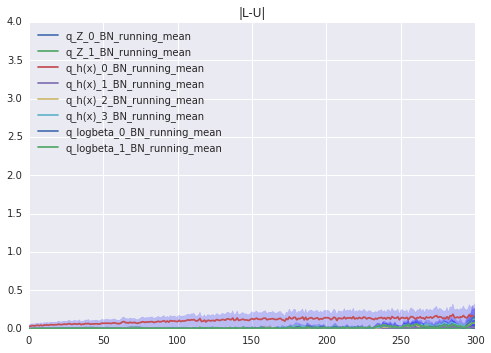

In [27]:
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'mean' in k:
        U = v['U']
        L = v['L']
        diff = np.abs(L-U)
        avgdiff = diff.mean(axis=1)
        p10diff = np.percentile(diff,20,axis=1)
        p90diff = np.percentile(diff,80,axis=1)
        plt.plot(avgdiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.2)
plt.legend(loc='upper left')
plt.title('|L-U|')
plt.ylim(0,4)

(0, 5)

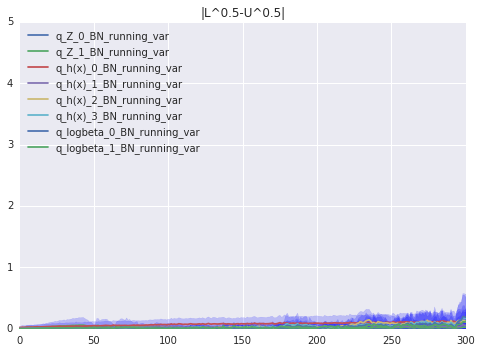

In [28]:
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'var' in k:
        U = v['U']
        L = v['L']
        diff = np.abs(L**0.5-U**0.5)
        avgdiff = diff.mean(axis=1)
        p10diff = np.percentile(diff,10,axis=1)
        p90diff = np.percentile(diff,90,axis=1)
        plt.plot(avgdiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.2)
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('|L^0.5-U^0.5|')
plt.ylim(0,5)

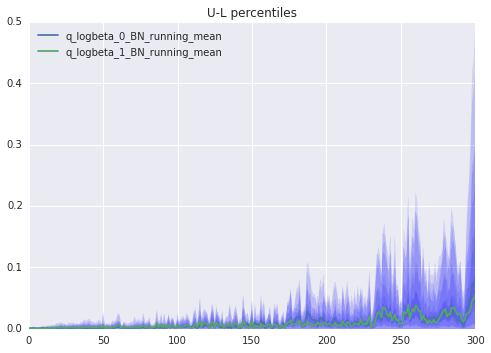

In [29]:
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'running_mean' in k and 'q_logbeta' in k:
        U = v['U']
        L = v['L']
        diff = np.abs(U-L)
        mediandiff = np.percentile(diff,50,axis=1)
        p05diff = np.percentile(diff,5,axis=1)
        p10diff = np.percentile(diff,10,axis=1)
        p25diff = np.percentile(diff,25,axis=1)
        p40diff = np.percentile(diff,40,axis=1)
        p60diff = np.percentile(diff,60,axis=1)
        p75diff = np.percentile(diff,75,axis=1)
        p90diff = np.percentile(diff,90,axis=1)
        p95diff = np.percentile(diff,95,axis=1)
        plt.plot(mediandiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p05diff,p95diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p25diff,p75diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p40diff,p60diff,color='b',alpha=0.1)
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('U-L percentiles')

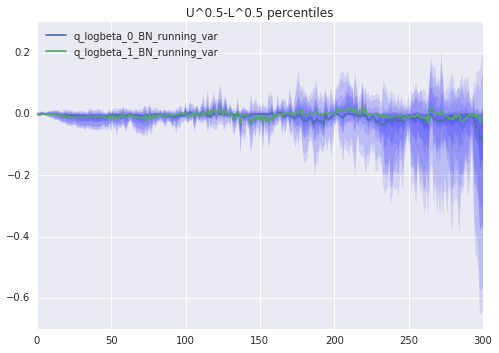

In [30]:
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'running_var' in k and 'q_logbeta' in k:
        U = v['U']
        L = v['L']
        diff = U**0.5-L**0.5
        mediandiff = np.percentile(diff,50,axis=1)
        p05diff = np.percentile(diff,5,axis=1)
        p10diff = np.percentile(diff,10,axis=1)
        p25diff = np.percentile(diff,25,axis=1)
        p40diff = np.percentile(diff,40,axis=1)
        p60diff = np.percentile(diff,60,axis=1)
        p75diff = np.percentile(diff,75,axis=1)
        p90diff = np.percentile(diff,90,axis=1)
        p95diff = np.percentile(diff,95,axis=1)
        plt.plot(mediandiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p05diff,p95diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p25diff,p75diff,color='b',alpha=0.1)
        plt.fill_between(np.arange(len(avgdiff)),p40diff,p60diff,color='b',alpha=0.1)
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('U^0.5-L^0.5 percentiles')

In [31]:
train_logbetas = {k:v for k,v in train.iteritems() if 'logbeta' in k and 'running' not in k}
sorted(train_logbetas.keys())

[u'logbeta_L', u'logbeta_U']

In [32]:
import scipy

In [33]:
#entropyL = scipy.stats.loggamma.entropy(np.exp(vals['train_logbetas']['logbeta_L']))

In [34]:
#entropyU = scipy.stats.loggamma.entropy(np.exp(vals['train_logbetas']['logbeta_U']))

In [35]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [36]:
def reshape(x,batch_size=100):
    y = []
    n = len(x)/batch_size
    for i in range(n):
        y.append(x[batch_size*i:batch_size*(i+1)].reshape(1,batch_size,-1))
    y = np.vstack(y)
    return y

def plotPercentiles(x=None,y=None,color='b',alpha=0.2,label=None,linewidth=1.):
    if y==None:
        xvals = None
        yvals = x
    else:
        xvals = x
        yvals = y
    p00_norm = np.percentile(yvals,0,axis=1)
    p05_norm = np.percentile(yvals,5,axis=1)
    p10_norm = np.percentile(yvals,10,axis=1)
    p25_norm = np.percentile(yvals,25,axis=1)
    p50_norm = np.percentile(yvals,50,axis=1)
    p75_norm = np.percentile(yvals,75,axis=1)
    p90_norm = np.percentile(yvals,90,axis=1)
    p95_norm = np.percentile(yvals,95,axis=1)
    p100_norm = np.percentile(yvals,100,axis=1)
    
    if xvals is None:
        xvals = np.arange(len(p50_norm))

    plt.plot(xvals,p50_norm,color=color,label=label,linewidth=linewidth)
    plt.fill_between(xvals,p00_norm,p100_norm,color=color,alpha=alpha)
    plt.fill_between(xvals,p05_norm,p95_norm,color=color,alpha=alpha)
    plt.fill_between(xvals,p10_norm,p90_norm,color=color,alpha=alpha)
    plt.fill_between(xvals,p25_norm,p75_norm,color=color,alpha=alpha)


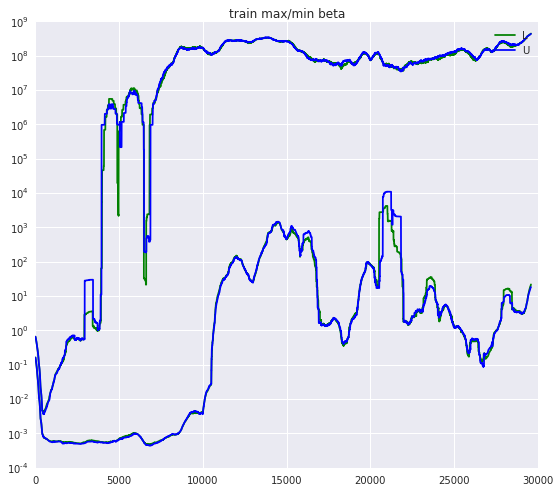

In [37]:
plt.figure(1,figsize=(9,8))
maxbetaL = moving_average(np.exp(train_logbetas['logbeta_L']).max(axis=1),n=500)
maxbetaU = moving_average(np.exp(train_logbetas['logbeta_U']).max(axis=1),n=500)
minbetaL = moving_average(np.exp(train_logbetas['logbeta_L']).min(axis=1),n=500)
minbetaU = moving_average(np.exp(train_logbetas['logbeta_U']).min(axis=1),n=500)
plt.plot(maxbetaL,label='L',color='g')
plt.plot(maxbetaU,label='U',color='b')
plt.plot(minbetaL,color='g')
plt.plot(minbetaU,color='b')
plt.legend()
plt.yscale('log')
#plt.ylim(0,1)
plt.title('train max/min beta')

In [38]:
from stats.randomvariates import randomLogGamma
import scipy

#dataset = train
#key = 'logbeta_L'
def plotAlphas(dataset,key,color='b',title=''):
    beta = reshape(np.exp(dataset[key]))
    u = np.vectorize(randomLogGamma)(beta)
    alpha = np.exp(u-scipy.misc.logsumexp(u,axis=-1,keepdims=True))
    alpha_sorted = np.sort(alpha,axis=-1)
    for k in range(10):
        vals = alpha_sorted[:,:,k]
        plotPercentiles(dataset['epochs'],vals,label='%s: median alpha=%0.2f'%(k,np.percentile(vals[-1,:],50)),color=color,alpha=0.05,linewidth=0.5)
    #plt.yscale('log')
    plt.xlim(0,500)
    plt.ylim(0,1)
    plt.title(title)
    plt.legend()
    #plt.show()

In [39]:
from stats.randomvariates import randomLogGamma
import scipy

#dataset = train
#key = 'logbeta_L'
def plotArgmaxAlphas(dataset,key,color='b',title=''):
    beta = reshape(np.exp(dataset[key]))
    argmax = np.argmax(beta,axis=-1)
    u = np.vectorize(randomLogGamma)(beta)
    alpha = np.exp(u-scipy.misc.logsumexp(u,axis=-1,keepdims=True))
    vals = np.squeeze(reshape(alpha[argmax.reshape(argmax.shape[0],argmax.shape[1],1) == np.arange(10).reshape(1,1,-1)].reshape(-1,1)))
    
    for p in np.arange(0,101,10):
        percentile = np.percentile(vals,p,axis=-1)
        plt.plot(dataset['epochs'],percentile,label='%sth percentile=%0.2f'%(p,percentile[-1]),color=color,linewidth=0.5)
    #plotPercentiles(dataset['epochs'],vals,label='median alpha=%0.2f'%(np.percentile(vals[-1,:],50)),color=color,alpha=0.05,linewidth=0.5)
    #plt.yscale('log')
    plt.xlim(0,500)
    plt.ylim(0,1)
    plt.title(title)
    plt.legend()
    #plt.show()

In [40]:
from stats.randomvariates import randomLogGamma
import scipy

#dataset = train
#key = 'logbeta_L'
def plotArgmaxAlphas2(dataset,key,color='b',title=''):
    beta = reshape(np.exp(dataset[key]))
    argmax = np.argmax(beta,axis=-1)
    u = np.vectorize(randomLogGamma)(beta)
    alpha = np.exp(u-scipy.misc.logsumexp(u,axis=-1,keepdims=True))
    vals = np.squeeze(reshape(alpha[argmax.reshape(argmax.shape[0],argmax.shape[1],1) == np.arange(10).reshape(1,1,-1)].reshape(-1,1)))
    vals = np.mean(vals>=0.5,axis=-1)
    plt.plot(dataset['epochs'],vals,label='p(alpha_{argmax(beta)}>=0.5)=%0.2f'%(vals[-1]),color=color,linewidth=0.5)
    #plotPercentiles(dataset['epochs'],vals,label='median alpha=%0.2f'%(np.percentile(vals[-1,:],50)),color=color,alpha=0.05,linewidth=0.5)
    #plt.yscale('log')
    plt.xlim(0,500)
    plt.ylim(0,1)
    plt.title(title)
    plt.legend()
    #plt.show()

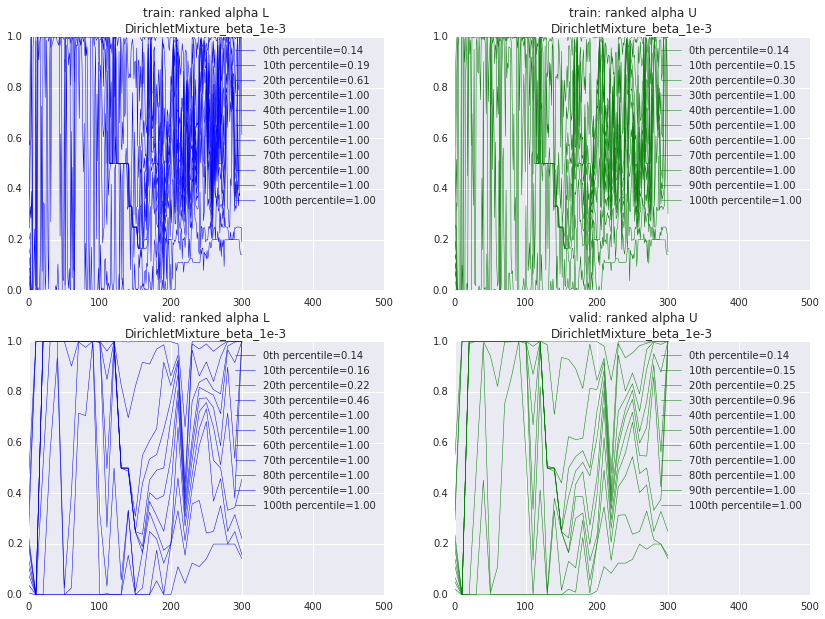

In [41]:
plt.figure(1,figsize=(14,10))
plt.subplot(2,2,1)
plotArgmaxAlphas(train,'logbeta_L',title='train: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,2)
plotArgmaxAlphas(train,'logbeta_U',title='train: ranked alpha U\n%s' % modelkey,color='g')
plt.subplot(2,2,3)
plotArgmaxAlphas(valid,'logbeta_L',title='valid: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,4)
plotArgmaxAlphas(valid,'logbeta_U',title='valid: ranked alpha U\n%s' % modelkey,color='g')

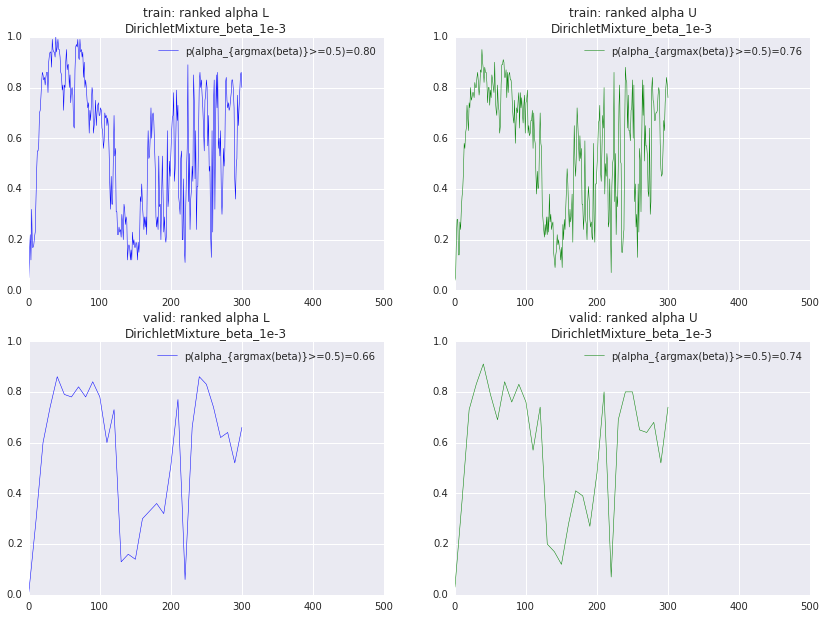

In [42]:
plt.figure(1,figsize=(14,10))
plt.subplot(2,2,1)
plotArgmaxAlphas2(train,'logbeta_L',title='train: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,2)
plotArgmaxAlphas2(train,'logbeta_U',title='train: ranked alpha U\n%s' % modelkey,color='g')
plt.subplot(2,2,3)
plotArgmaxAlphas2(valid,'logbeta_L',title='valid: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,4)
plotArgmaxAlphas2(valid,'logbeta_U',title='valid: ranked alpha U\n%s' % modelkey,color='g')

## Distribution of alpha

-c:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


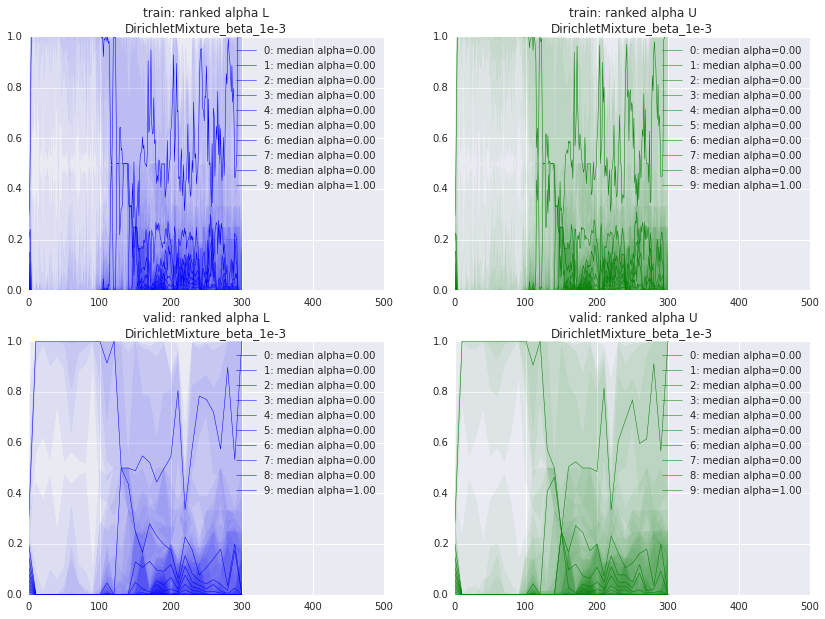

In [43]:
plt.figure(1,figsize=(14,10))
plt.subplot(2,2,1)
plotAlphas(train,'logbeta_L',title='train: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,2)
plotAlphas(train,'logbeta_U',title='train: ranked alpha U\n%s' % modelkey,color='g')
plt.subplot(2,2,3)
plotAlphas(valid,'logbeta_L',title='valid: ranked alpha L\n%s' % modelkey)
plt.subplot(2,2,4)
plotAlphas(valid,'logbeta_U',title='valid: ranked alpha U\n%s' % modelkey,color='g')

## q(y*|x)

In [44]:
def plotqyx(dataset,key,Y,color='b'):
    logbeta = reshape(dataset[key])
    probs = np.exp(logbeta-scipy.misc.logsumexp(logbeta,axis=-1,keepdims=True))
    y = reshape(dataset['Y'])
    qy_x = np.sum(probs*y,axis=-1)
    plotPercentiles(dataset['epochs'],qy_x,color=color)

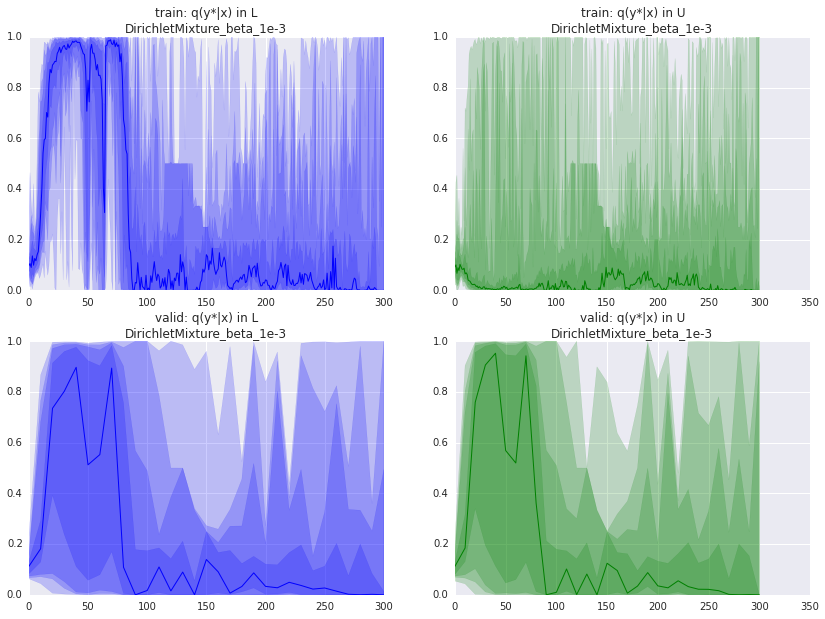

In [45]:
plt.figure(1,figsize=(14,10))
plt.subplot(2,2,1)
plotqyx(train,'logbeta_L',Y=reshape(train['Y']))
plt.title('train: q(y*|x) in L\n%s' % modelkey)
plt.subplot(2,2,2)
YU = (train['YU'].reshape(list(train['YU'].shape) + [1]) == np.arange(10).reshape(1,1,-1)).astype('float')
plotqyx(train,'logbeta_U',Y=YU,color='g')
plt.title('train: q(y*|x) in U\n%s' % modelkey)
plt.subplot(2,2,3)
plotqyx(valid,'logbeta_L',Y=reshape(valid['Y']))
plt.title('valid: q(y*|x) in L\n%s' % modelkey)
plt.subplot(2,2,4)
plotqyx(valid,'logbeta_U',Y=reshape(valid['Y']),color='g')
plt.title('valid: q(y*|x) in U\n%s' % modelkey)

## Inferred Betas

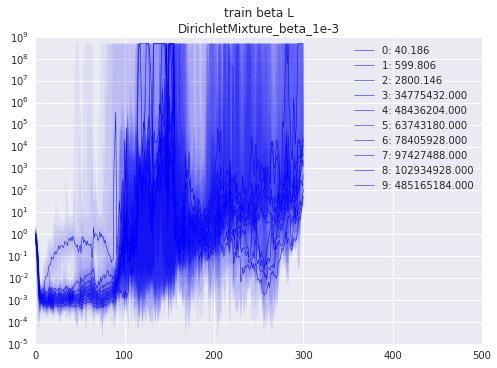

In [46]:
sortedL = np.sort(np.exp(train['logbeta_L']),axis=1)
for k in range(10):
    vals = reshape(sortedL)[:,:,k]
    plotPercentiles(vals,label='%s: %0.3f'%(k,vals[-1,:].mean()),alpha=0.05,linewidth=0.5)
plt.yscale('log')
plt.xlim(0,500)
#plt.ylim(1e-2,1e2)
plt.title('train beta L\n%s' % modelkey)
plt.legend()
plt.show()

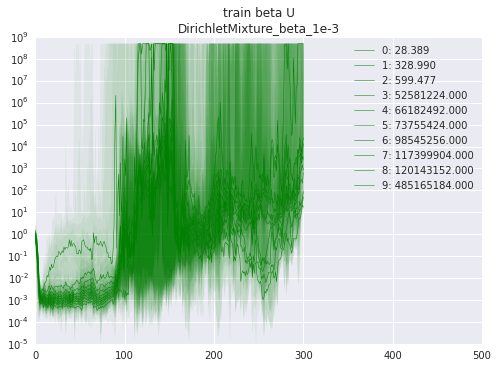

In [47]:
sortedU = np.sort(np.exp(train['logbeta_U']),axis=1)
for k in range(10):
    vals = reshape(sortedU)[:,:,k]
    plotPercentiles(vals,label='%s: %0.3f'%(k,vals[-1,:].mean()),color='g',alpha=0.05,linewidth=0.5)
plt.yscale('log')
plt.xlim(0,500)
#plt.ylim(1e-2,1e2)
plt.title('train beta U\n%s' % modelkey)
plt.legend()
plt.show()

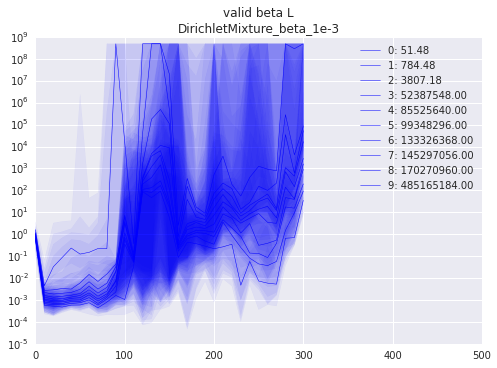

In [49]:
sortedL = np.sort(np.exp(valid['logbeta_L']),axis=1)
for k in range(10):
    vals = reshape(sortedL)[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: %0.2f'%(k,vals[-1,:].mean()),color='b',alpha=0.05,linewidth=0.5)
plt.yscale('log')
plt.xlim(0,500)
#plt.ylim(1e-2,1e2)
plt.title('valid beta L\n%s' % modelkey)
plt.legend()
plt.show()

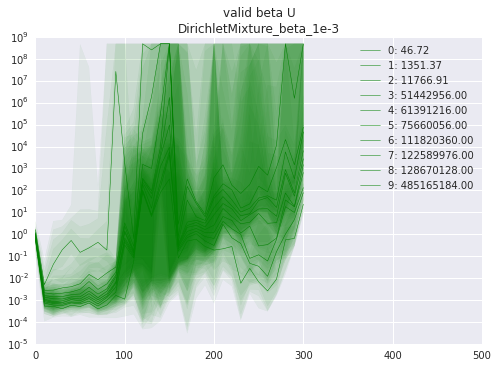

In [50]:
sortedU = np.sort(np.exp(valid['logbeta_U']),axis=1)
for k in range(10):
    vals = reshape(sortedU)[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: %0.2f'%(k,vals[-1,:].mean()),color='g',alpha=0.05,linewidth=0.5)
plt.yscale('log')
plt.xlim(0,500)
#plt.ylim(1e-2,1e2)
plt.title('valid beta U\n%s' % modelkey)
plt.legend()
plt.show()

## KL

(0, 1000)

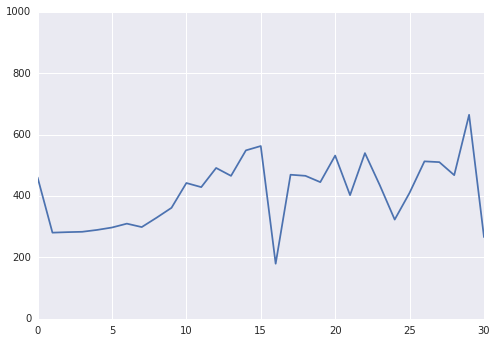

In [51]:
bound = valid['bound']
plt.plot(bound)
plt.ylim(0,1000)

In [52]:
bound

array([[ 460.72697455],
       [ 280.72270833],
       [ 282.34884132],
       [ 283.52602579],
       [ 289.60668953],
       [ 297.46263648],
       [ 310.0600718 ],
       [ 298.86099603],
       [ 329.47084913],
       [ 361.63637035],
       [ 442.46232734],
       [ 429.03594116],
       [ 491.5116181 ],
       [ 465.76781202],
       [ 548.80004664],
       [ 562.93593442],
       [ 179.47440023],
       [ 469.451049  ],
       [ 465.90013882],
       [ 445.2870113 ],
       [ 531.87937341],
       [ 402.86818848],
       [ 539.91922046],
       [ 435.15992847],
       [ 323.28455811],
       [ 410.49032849],
       [ 513.00936239],
       [ 510.48029124],
       [ 468.07572704],
       [ 664.71275071],
       [ 266.18217751]])

In [53]:
betas = np.exp(reshape(valid['logbeta_L']))
betas.shape

(31, 100, 10)

In [54]:
def getKL(beta,betaprior=5e-3):
    return (scipy.special.gammaln(betaprior)-scipy.special.gammaln(beta)-(betaprior-beta)*scipy.special.psi(beta)).sum(axis=-1,keepdims=True)

annealBP = train['annealBP']*100
betaprior = 0.2*(1-annealBP) + 5e-3*annealBP
betaprior = betaprior[valid['epochs']].reshape(-1,1,1)
KLs = np.squeeze(getKL(betas,betaprior))
KLs.shape

(31, 100)

(0, 100)

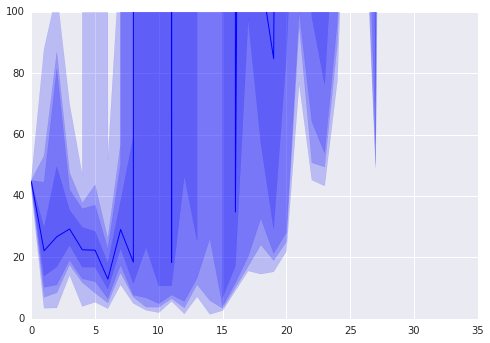

In [55]:
plotPercentiles(np.squeeze(KLs))
plt.ylim(0,100)

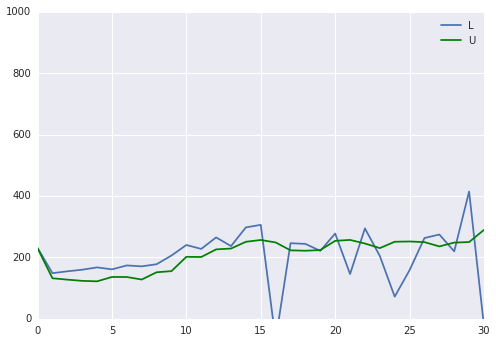

In [56]:
boundL = valid['boundL']
boundU = valid['boundU']
plt.plot(boundL,label='L')
plt.plot(boundU,label='U',color='g')
plt.ylim(0,1000)
plt.legend()

In [71]:
valid['KL_alphaU'].shape

(31, 100)

In [76]:
np.squeeze(reshape(valid['KL_alphaL']))

array([[  4.85405768e+01,   4.79258515e+01,   4.78621102e+01, ...,
          4.50484664e+01,   4.84276248e+01,   4.83489777e+01],
       [  2.31447269e+00,   2.04313140e+00,   4.34274350e-01, ...,
          7.46315258e-01,   1.76867535e+00,   2.44689962e+00],
       [  1.52208438e+00,   2.24855105e+00,   7.61594263e+00, ...,
          1.66618661e+00,   7.19755779e-01,   9.40483794e-01],
       ..., 
       [  2.20387735e+02,  -1.20558948e+03,  -2.62451051e+02, ...,
         -1.05257122e+02,  -2.56957827e+03,   5.29240306e+01],
       [  6.70814582e+01,   4.49352900e+02,   6.18064576e+01, ...,
          6.25291961e+01,   6.03455590e+01,  -1.33909473e+03],
       [ -1.29639659e+03,  -9.06019167e+02,  -4.31699770e+02, ...,
         -4.22934405e+02,  -1.94509399e+03,  -4.87636664e+02]])

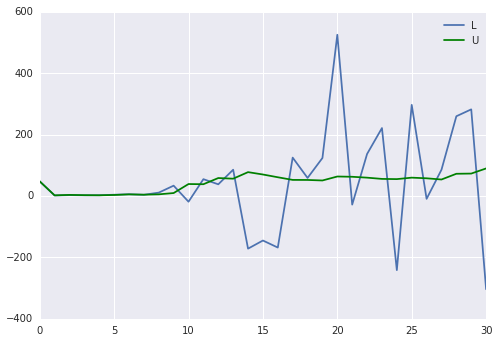

In [77]:
KL_loggammaL = np.squeeze(reshape(valid['KL_alphaL']))
KL_loggammaU = valid['KL_alphaU']
plt.plot(KL_loggammaL.mean(axis=1),label='L')
plt.plot(KL_loggammaU.mean(axis=1),label='U',color='g')

#plt.yscale('log')
plt.legend()
#plt.plot(KLs.mean(axis=-1),color='r')

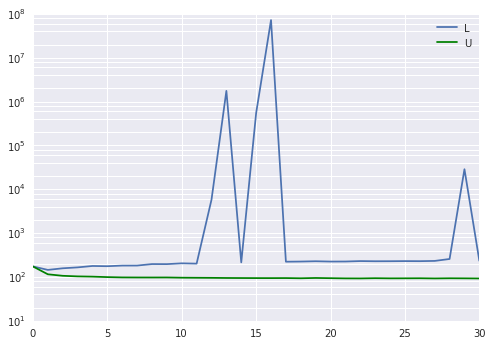

In [469]:
NLL_L = valid['NLL_L']
NLL_U = valid['NLL_U']
plt.plot(NLL_L,label='L')
plt.plot(NLL_U,label='U',color='g')
#plt.ylim(0,1000)
plt.yscale('log')
plt.legend()

(31, 1)

## Params

In [263]:
params = results[modelkey]['params']
params.keys()

In [264]:
q_alpha_hx_b = params['q_alpha_h(x)_b']
q_alpha_hx_b.shape

In [265]:
plotPercentiles(q_alpha_hx_b)

In [266]:
q_alpha_hx_W = params['q_alpha_h(x)_W']
q_alpha_hx_W.shape

In [267]:
wTw = []
for epoch in range(q_alpha_hx_W.shape[0]):
    wTw_epoch = []
    for i in range(9):
        for j in range(i+1,10):
            wi = q_alpha_hx_W[epoch,i]
            wj = q_alpha_hx_W[epoch,j]
            wTw_epoch.append(np.dot(wi,wj)/np.linalg.norm(wi)/np.linalg.norm(wj))
    wTw.append(wTw_epoch)
wTw = np.array(wTw)
plotPercentiles(params['epochs'],np.abs(wTw))
plt.title('distribution of cosine similarities between vectors\nin q_alpha_h(x)_W\n%s' % modelkey)
plt.xlabel('epochs')
plt.ylabel('|cosine|')

## Z

In [268]:
muL = train['mu_L']
muU = train['mu_U']
print muU.shape

In [269]:
sorted_muL = muL[:,np.argsort(muL[-1])]
for i in range(muL.shape[1]):
    plt.plot(moving_average(sorted_muL[:,i],n=100),color='b',linewidth=0.1)

In [270]:
sorted_muU = muU[:,np.argsort(muU[-1])]
for i in range(muU.shape[1]):
    plt.plot(moving_average(sorted_muU[:,i],n=100),color='g',linewidth=0.1)

In [271]:
logcov2L = train['logcov2_L']
logcov2U = train['logcov2_U']
print logcov2U.shape
sigmaU = np.exp(0.5*logcov2U)
sigmaL = np.exp(0.5*logcov2L)

In [272]:
KL_U = 0.5*(np.exp(logcov2U)+muU**2.0-1.0-logcov2U)
KL_L = 0.5*(np.exp(logcov2L)+muL**2.0-1.0-logcov2L)

In [273]:
sorted_KL_U = np.sort(KL_U,axis=1)
for k in range(KL_U.shape[1]):
    vals = reshape(sorted_KL_U)[:,:,k]
    plotPercentiles(vals,color='g',alpha=0.05,linewidth=0.5)
#plt.xlim(0,500)
plt.ylim(0,9)
plt.title('KL(Z)_U')
plt.legend()
plt.show()

sorted_KL_L = np.sort(KL_L,axis=1)
for k in range(KL_L.shape[1]):
    vals = reshape(sorted_KL_L)[:,:,k]
    plotPercentiles(vals,color='b',alpha=0.05,linewidth=0.5)
#plt.xlim(0,500)
plt.ylim(0,9)
plt.title('KL(Z)_L')
plt.legend()
plt.show()


In [274]:
plt.figure(1,figsize=(16,6))

plt.subplot(1,2,1)
sorted_KL_U = KL_U[:,np.argsort(KL_U[-1])]
for i in range(KL_U.shape[1]):
    plt.plot(moving_average(sorted_KL_U[:,i],n=100),color='g',linewidth=0.5)
activeKL_U = np.sum(KL_U > 0.1,axis=1)
activeKL_U = moving_average(activeKL_U,n=100)
plt.plot(activeKL_U,color='k',label='# active KLs > 0.2')
plt.title('train KL(Z)_U')
plt.ylim(0,12)
plt.legend()

plt.subplot(1,2,2)
sorted_KL_L = KL_L[:,np.argsort(KL_L[-1])]
for i in range(KL_L.shape[1]):
    plt.plot(moving_average(sorted_KL_L[:,i],n=100),color='b',linewidth=0.5)
activeKL_L = np.sum(KL_L > 0.1,axis=1)
activeKL_L = moving_average(activeKL_L,n=100)
plt.plot(activeKL_L,color='k',label='# active KLs > 0.2')
plt.title('train KL(Z)_L')
plt.ylim(0,12)
plt.legend()

In [275]:
plt.figure(1,figsize=(16,6))

muL = valid['mu_L']
muU = valid['mu_U']
logcov2L = valid['logcov2_L']
logcov2U = valid['logcov2_U']
sigmaU = np.exp(0.5*logcov2U)
sigmaL = np.exp(0.5*logcov2L)
KL_U = 0.5*(np.exp(logcov2U)+muU**2.0-1.0-logcov2U)
KL_L = 0.5*(np.exp(logcov2L)+muL**2.0-1.0-logcov2L)

plt.subplot(1,2,1)
sorted_KL_U = KL_U[:,np.argsort(KL_U[-1])]
for i in range(KL_U.shape[1]):
    plt.plot(moving_average(sorted_KL_U[:,i],n=100),color='g',linewidth=0.5)
activeKL_U = np.sum(KL_U > 0.1,axis=1)
activeKL_U = moving_average(activeKL_U,n=10)
plt.plot(activeKL_U,color='k',label='# active KLs > 0.2')
plt.title('valid KL(Z)_U')
plt.ylim(0,12)
plt.legend()

plt.subplot(1,2,2)
sorted_KL_L = KL_L[:,np.argsort(KL_L[-1])]
for i in range(KL_L.shape[1]):
    plt.plot(moving_average(sorted_KL_L[:,i],n=100),color='b',linewidth=0.5)
activeKL_L = np.sum(KL_L > 0.1,axis=1)
activeKL_L = moving_average(activeKL_L,n=10)
plt.plot(activeKL_L,color='k',label='# active KLs > 0.2')
plt.title('valid KL(Z)_L')
plt.ylim(0,12)
plt.legend()